In [1]:
%load_ext lab_black

In [26]:
from puzzles import load

`hlf r` sets register r to half its current value, then continues with the next instruction.

`tpl r` sets register r to triple its current value, then continues with the next instruction.

`inc r` increments register r, adding 1 to it, then continues with the next instruction.

`jmp offset` is a jump; it continues with the instruction offset away relative to itself.

`jie r`, offset is like jmp, but only jumps if register r is even ("jump if even").

`jio r`, offset is like jmp, but only jumps if register r is 1 ("jump if one", not odd).


In [35]:
def inc_a(d):
    def f():
        d["a"] += 1
        d["i"] += 1

    return f


def inc_b(d):
    def f():
        d["b"] += 1
        d["i"] += 1

    return f


def hlf_a(d):
    def f():
        d["a"] //= 2
        d["i"] += 1

    return f


def hlf_b(d):
    def f():
        d["b"] //= 2
        d["i"] += 1

    return f


def tpl_a(d):
    def f():
        d["a"] *= 3
        d["i"] += 1

    return f


def tpl_b(d):
    def f():
        d["b"] *= 3
        d["i"] += 1

    return f


def jmp(d, offset):
    def f():
        d["i"] += offset

    return f


def jie(d, register, offset):
    def f():
        if d[register] % 2 == 0:
            d["i"] += offset
        else:
            d["i"] += 1

    return f


def jio(d, register, offset):
    def f():
        if d[register] == 1:
            d["i"] += offset
        else:
            d["i"] += 1

    return f

In [36]:
def parse_commands(cmds, d):
    result = []
    for cmd in cmds:
        if cmd == "inc a":
            result.append(inc_a(d))
        elif cmd == "inc b":
            result.append(inc_b(d))
        elif cmd == "tpl a":
            result.append(tpl_a(d))
        elif cmd == "tpl b":
            result.append(tpl_b(d))
        elif cmd == "hlf a":
            result.append(hlf_a(d))
        elif cmd == "hlf b":
            result.append(hlf_b())
        elif cmd.startswith("jmp"):
            _, offset = cmd.split()
            offset = int(offset)
            result.append(jmp(d, offset))
        elif cmd.startswith("jie"):
            _, reg, offset = cmd.split()
            reg = reg[:-1]
            offset = int(offset)
            result.append(jie(d, reg, offset))
        elif cmd.startswith("jio"):
            _, reg, offset = cmd.split()
            reg = reg[:-1]
            offset = int(offset)
            result.append(jio(d, reg, offset))
        else:
            raise ValueError(f"Unknown command: {cmd}")
    return result

In [47]:
d = {"a": 1, "b": 0, "i": 0, "as": [], "bs": []}

cmds = load(23).strip().split("\n")

# cmds = """inc a
# jio a, +2
# tpl a
# inc a""".split(
#     "\n"
# )

executor = parse_commands(cmds, d)

while True:
    executor[d["i"]]()

IndexError: list index out of range

In [48]:
import matplotlib.pyplot as plt

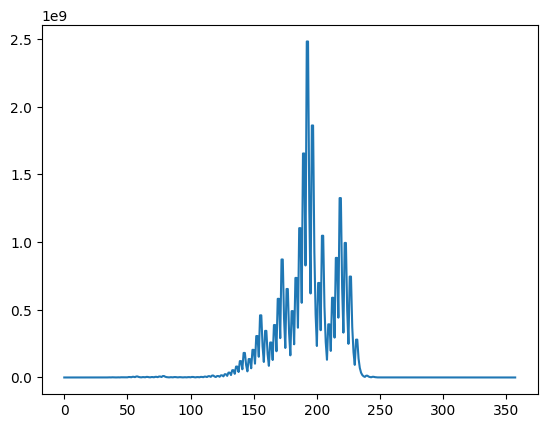

In [49]:
plt.plot(d["as"])